# HW1 Solution

## Part I

In this homework, you will build an Jupyter notebook for predicting house prices, using data from King County, USA, the region where the city of Seattle is located.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from sklearn import metrics
%matplotlib inline

In [40]:
df = pd.read_csv("home_data.csv", index_col=0)

### 1. Selection and summary statistics:

Which neighborhood (zip code) of Seattle has the highest average house sale price? Now, take the sales data, select only the houses with this zip code, and compute the average price.

In [4]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.groupby('zipcode')['price'].mean().sort_values(ascending = False).round(2).head(1)

zipcode
98039    2160606.6
Name: price, dtype: float64

### Filtering data:


One of the key features is the number of square feet of living space (‘sqft_living’) in the house. Select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft. What fraction of the all houses have ‘sqft_living’ in this range?

In [7]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
len(df[(df.sqft_living > 2000) & (df.sqft_living <= 4000)]) / len(df)

0.42187572294452413

### Visualization:

Plot the relationship between ‘house sale price’ and ‘sqft_living’

In [9]:
pd.set_option('display.max_columns',50)

In [10]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
X = df[['sqft_living']]

In [12]:
y = df.price

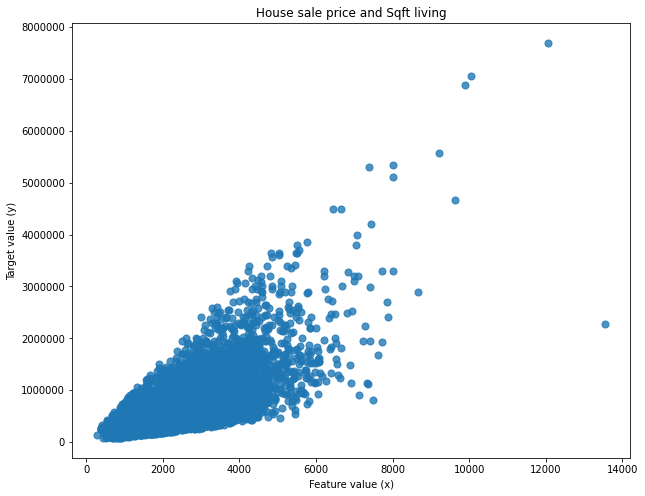

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.title('House sale price and Sqft living')
plt.ticklabel_format(useOffset = False, style = 'plain')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### 4. Building regression models with different features (all models must be fit on the original sales dataset, not the one filtered on `sqft_living`. Do NOT split the data into training and test sets):

Build a regression model to predict house prices using just ‘sqft_living’ and add the trend line in the plot in part 3. Report the intercept and slope.

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
X.shape

(21613, 1)

In [16]:
y.shape

(21613,)

In [17]:
linreg = LinearRegression().fit(X, y)

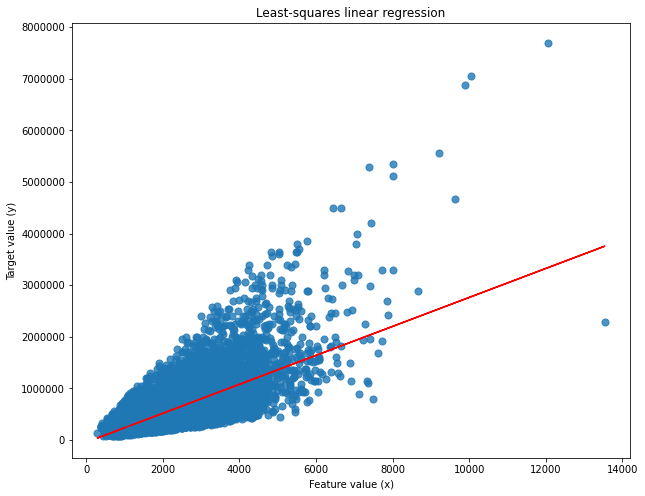

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.ticklabel_format(useOffset = False, style = 'plain')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [19]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg.score(X, y)))

linear model coeff (w): [280.62356663]
linear model intercept (b): -43580.740
R-squared score: 0.493


Using this simple regression model, what is the predicted price for a house with 2650 sqft?

In [21]:
X_new = [[2650]]

In [22]:
linreg.predict(X_new)

array([700071.71125207])

Using this simple regression model, what is the estimated square-feet for a house costing $800,000?

In [23]:
inverse_pred = (800000 - linreg.intercept_)/linreg.coef_

In [24]:
inverse_pred[0]

3006.0937163854865

Build a regression model to predict house prices using just ‘bedrooms’. Report the intercept and slope.

In [26]:
linreg_bed = LinearRegression().fit(X_bed, y)

In [27]:
print('linear model coeff (w): {}'
     .format(linreg_bed.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg_bed.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg_bed.score(X_bed, y)))

linear model coeff (w): [121716.12623836]
linear model intercept (b): 129802.357
R-squared score: 0.095


Using this simple regression model, what is the predicted price for a house with 3 bedrooms?

In [28]:
X_new_bed = [[3]]

In [29]:
linreg_bed.predict(X_new_bed)

array([494950.736094])

Compute and compare the RMSE (root mean squared error) of the two models.

In [30]:
from sklearn.metrics import mean_squared_error

housing_predictions = linreg.predict(X)
lin_mse = mean_squared_error(y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

261440.79072267728

In [31]:
housing_predictions_bed = linreg_bed.predict(X_bed)
lin_mse_bed = mean_squared_error(y, housing_predictions_bed)
lin_rmse_bed = np.sqrt(lin_mse_bed)
lin_rmse_bed

349230.1491907254

## Part II

<i><b>1. Load the breast cancer dataset. Import the functions `load_breast_cancer` from `sklearn.datasets`.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

<i><b>2. Provide an explanation of the data set.

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.


In [42]:
#print(cancer.DESCR)

<i><b>3. What are the features in the data set?

In [36]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

<i><b>4. Create some basic visualization of the data set.

In [44]:
import mglearn

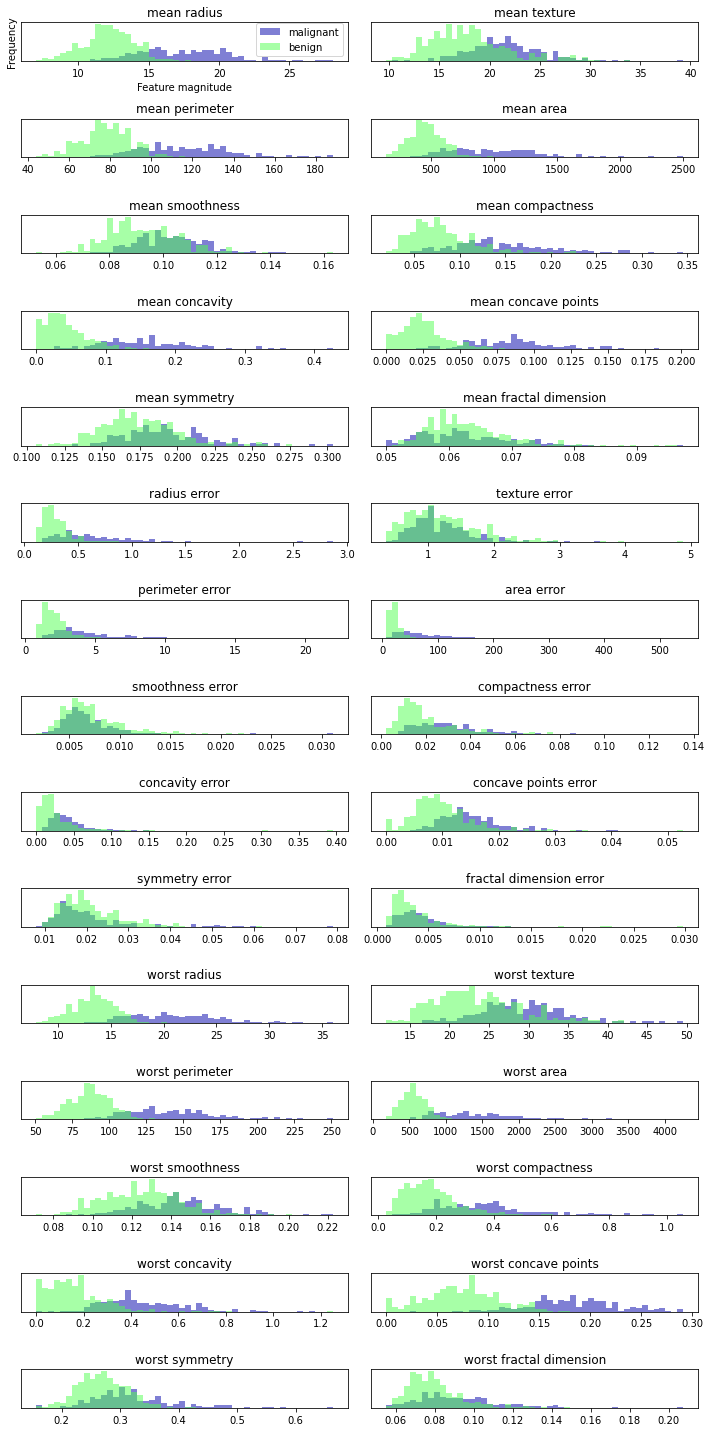

In [45]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()
# 30 features, 2 classes

<i><b>5. Split the data into training set (80%) and test set (20%) using random_state = 0.

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], test_size = 0.2, stratify = cancer['target'], random_state=0)

In [7]:
type(cancer['target'])

numpy.ndarray

In [8]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (455, 30)
y_train shape: (455,)


In [9]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (114, 30)
y_test shape: (114,)


<i><b>6. Build KNN models with n_neighbors = {1,2,3,4,5}. Compare their performance on the training set and test set. Which one is the best model?

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [11]:
pipe_knn = Pipeline([('classifier', KNeighborsClassifier())])

In [12]:
param_grid = {'classifier__n_neighbors': range(1,6)}

In [13]:
grid_knn = GridSearchCV(pipe_knn, param_grid = param_grid, cv = 5, n_jobs = -1, return_train_score = True)
grid_knn.fit(X_train, y_train)
grid_knn.best_params_

{'classifier__n_neighbors': 5}

In [14]:
print("Training set score: {:.2f}".format(grid_knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid_knn.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.91


<b> OR ** Without Pipeline</b>

In [15]:
for i in range(1,6):  
    knn = KNeighborsClassifier(n_neighbors=i)
    (knn.fit(X_train, y_train))
    
    print("Training set score(n_neighbors={}) : {:.2f}".format(i,knn.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Training set score(n_neighbors=1) : 1.00
Test set score: 0.91
Training set score(n_neighbors=2) : 0.96
Test set score: 0.87
Training set score(n_neighbors=3) : 0.96
Test set score: 0.90
Training set score(n_neighbors=4) : 0.96
Test set score: 0.90
Training set score(n_neighbors=5) : 0.95
Test set score: 0.91


<b> OR ** Without Pipeline</b>

In [16]:
knn1 = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn1.fit(X_train, y_train)
print("Training set score for n_neighbors = 1: {:.2f}".format(knn1.score(X_train, y_train)))
print("Test set score n_neighbors = 1: {:.2f}".format(knn1.score(X_test, y_test)))

Training set score for n_neighbors = 1: 1.00
Test set score n_neighbors = 1: 0.91


In [18]:
knn2 = KNeighborsClassifier(n_neighbors=2)

In [19]:
knn2.fit(X_train, y_train)
print("Training set score for n_neighbors = 2: {:.2f}".format(knn2.score(X_train, y_train)))
print("Test set score n_neighbors = 2: {:.2f}".format(knn2.score(X_test, y_test)))

Training set score for n_neighbors = 2: 0.96
Test set score n_neighbors = 2: 0.87


In [20]:
knn3 = KNeighborsClassifier(n_neighbors=3)

In [21]:
knn3.fit(X_train, y_train)
print("Training set score for n_neighbors = 3: {:.2f}".format(knn3.score(X_train, y_train)))
print("Test set score n_neighbors = 3: {:.2f}".format(knn3.score(X_test, y_test)))

Training set score for n_neighbors = 3: 0.96
Test set score n_neighbors = 3: 0.90


In [22]:
knn4 = KNeighborsClassifier(n_neighbors=4)

In [23]:
knn4.fit(X_train, y_train)
print("Training set score for n_neighbors = 4: {:.2f}".format(knn4.score(X_train, y_train)))
print("Test set score n_neighbors = 4: {:.2f}".format(knn4.score(X_test, y_test)))

Training set score for n_neighbors = 4: 0.96
Test set score n_neighbors = 4: 0.90


In [24]:
knn5 = KNeighborsClassifier(n_neighbors=5)

In [25]:
knn5.fit(X_train, y_train)
print("Training set score for n_neighbors = 5: {:.2f}".format(knn5.score(X_train, y_train)))
print("Test set score n_neighbors = 5: {:.2f}".format(knn5.score(X_test, y_test)))

Training set score for n_neighbors = 5: 0.95
Test set score n_neighbors = 5: 0.91
